# Library 
 - Beautifulsoup4 
 - Numpy
 - Pandas ( Series , DataFrame ) 

In [1]:
import pandas as pd
import numpy as np

s = pd.Series([1,2,3,np.nan])  # 1차원 행렬로 나온다. 
print(s)
print(type(s))

dates = pd.date_range('20150901', periods=6)  
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))   # 2차원 행렬로 생성. 

print(df)

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64
<class 'pandas.core.series.Series'>
                   A         B         C         D
2015-09-01 -0.698195  0.731211 -1.184099 -0.199095
2015-09-02 -1.442785  1.616107 -1.338164  0.639957
2015-09-03 -1.304309 -0.471082 -0.208027  0.519572
2015-09-04 -1.033084  0.585062  1.514515 -0.892053
2015-09-05  0.371366  0.669808  0.148890  1.221939
2015-09-06  1.171770  1.405118  0.571024 -0.618583


In [4]:
import pandas as pd
from pandas import Series, DataFrame

titanic_df = pd.read_csv('train.csv')
print(titanic_df.head())
titanic_df.info()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

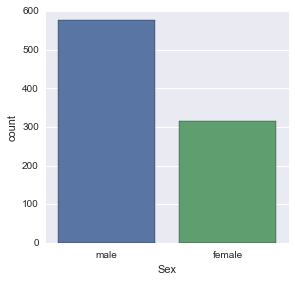

In [5]:
sns.factorplot('Sex', kind='count', data=titanic_df)  # Sex를 기준으로 Count를 세어 plot을 그려준다. data 는 titanic_df를 활용. 

In [3]:
titanic_df.Pclass.unique()  # 3,1,2 의 Class 를 가지고 있다. 

array([3, 1, 2], dtype=int64)

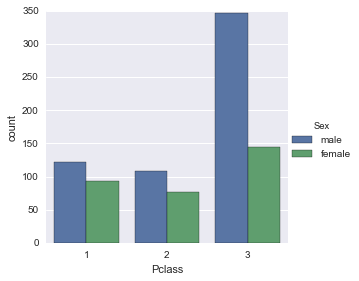

In [7]:
sns.factorplot('Pclass', kind='count', hue='Sex', order=[1,2,3], data=titanic_df)    #order에 순서를 준다.  # sex로 구분하여. 

In [9]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1) # 1개의 로우씩 데이터를 입력하여 처리 apply(함수,margin=1,2)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


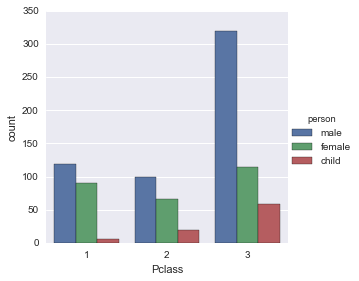

In [11]:
sns.factorplot('Pclass', kind='count', hue='person', order=[1,2,3], data=titanic_df)   # person으로 구분하여. ( 아이들을 표현 )

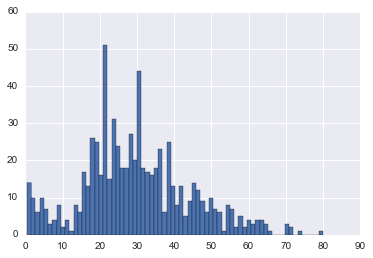

In [13]:
titanic_df['Age'].hist(bins=70) # 70개의 bar로 구성. 

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [9]:
deck = titanic_df['Cabin'].dropna()  # R에서 rm.na = T와 동일한 문장. 
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [7]:
levels = []
for level in deck:
    levels.append(level[0]) # 리스트로 만들어버리면 문자열은 "C","8","5" 이런형태로 만들어져서 앞글자만 가지고 올 수 있다. level[0] = C
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


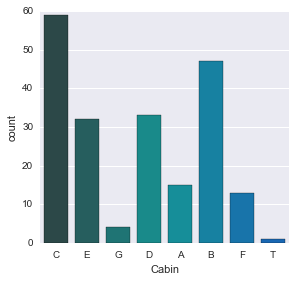

In [23]:
sns.factorplot('Cabin', kind='count', data=cabin_df, palette='winter_d')

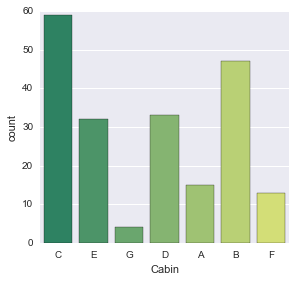

In [25]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', kind='count', data=cabin_df, palette='summer')

In [27]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})  # 데이터를 0이면 no 1이면 ㅛㄷㄴ
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,no


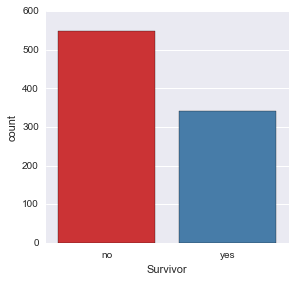

In [29]:
sns.factorplot('Survivor', kind='count', data=titanic_df, palette='Set1')

In [31]:
titanic_df['Survivor'].value_counts()

no     549
yes    342
Name: Survivor, dtype: int64

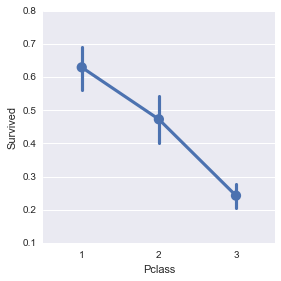

In [33]:
sns.factorplot('Pclass','Survived',data=titanic_df, order=[1,2,3])  # 독립변수  Pclass , 종속 변수 Survived

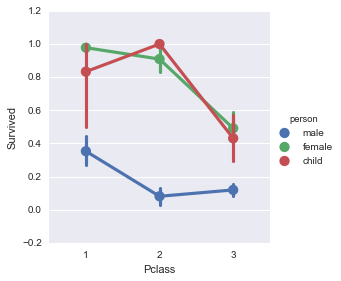

In [35]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, order=[1,2,3])

### 나이와 생존률 
 - Line 그래프 활용. 
 - 그래프를 보면 나이가 많아 질 수록 생존률이 떨어진다.

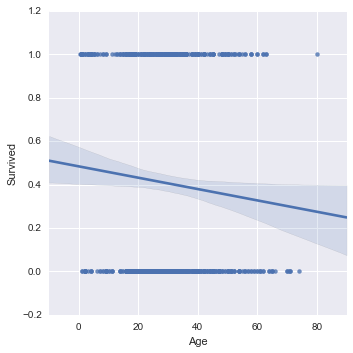

In [37]:
sns.lmplot('Age', 'Survived', data=titanic_df)

### 나이에 따른 생존률에 좌석 등급별 차이 
 - 1등급일 수록 나이가 많아도 그나마 생존률이 높다. 

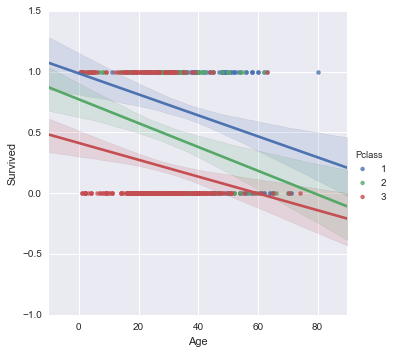

In [39]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df)   

### 나이에 따른 생존률을 성별로 나눈 결과 
 - 여성과 남성은 반대로 결과가 나타났다.

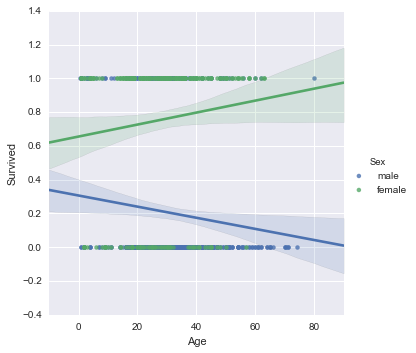

In [16]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df)